# Mini-projeto - MNIST

## Classificação de dígitos manuscritos do MNIST

Para este mini-projeto da disciplina eletiva de Redes Neurais (código IF702) serão feitos experimentos com a rede neural desenvolvida por Michael Nielsen e disponível no GitHub através do link https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py .

Para este projeto foram consultadas as insruções do livro disponível em http://neuralnetworksanddeeplearning.com/ também escrito por Michael Nielsen.

Uma última ressalva é que este programa foi modificado para ser compatível com Python em sua versão 3, pois como veremos na linha abaixo, a versão na qual o programa será executado será a distribuição Python da Intel(R) para maior ganho de performance. Para isto foram feitos pequenos ajustes na sintaxe e na biblioteca cPickle, que agora é a _pickle no código onde ocorre a exportação das imagens do arquivo compactado mnist.pkl.gz. Além dessas modificações para python3 ainda houve uma modificação a respeito do rastreamento da acurácia por classe, que foi requisitado pelo prof da disciplina, Germano C. Vasconcelos.

## Dia 1:

In [1]:
import sys
print(sys.version)

3.6.8 |Intel Corporation| (default, Mar  1 2019, 00:10:45) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


Agora, partindo para a ação vou deixar o código modificado otimizado para essa versão em meu GitHub (@pedrovbeltran).

In [2]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

Na linha acima exportamos os dados de treinamento, validação e teste. Por hora só usaremos os dados de treinamento e teste. Agora roderemos o código propriamente dito. Por motivos de praticidade eu automatizei o processo de parada do treinamento com o seguinte algoritmo:


**Se não houver melhora alguma na acurácia geral em 5 épocas: PARE**

**Caso contrário: CONTINUE O TREINAMENTO**


O livro do Nielsen chama essa técnica de *early stopping* e é citada no capítulo 3.

*P.S.: Talvez eu esteja sendo um pouco pessimista com relação à quantidade de épocas, mas tendo em vista que isto é apenas um teste, para deixar o processo mais rápido deixarei em 5.*

In [3]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8283 / 10000
Epoch 2: 8423 / 10000
Epoch 3: 9211 / 10000
Epoch 4: 9266 / 10000
Epoch 5: 9295 / 10000
Epoch 6: 9349 / 10000
Epoch 7: 9346 / 10000
Epoch 8: 9362 / 10000
Epoch 9: 9394 / 10000
Epoch 10: 9402 / 10000
Epoch 11: 9419 / 10000
Epoch 12: 9412 / 10000
Epoch 13: 9405 / 10000
Epoch 14: 9405 / 10000
Epoch 15: 9444 / 10000
Epoch 16: 9427 / 10000
Epoch 17: 9451 / 10000
Epoch 18: 9446 / 10000
Epoch 19: 9428 / 10000
Epoch 20: 9490 / 10000
Epoch 21: 9447 / 10000
Epoch 22: 9413 / 10000
Epoch 23: 9478 / 10000
Epoch 24: 9446 / 10000
Epoch 25: 9468 / 10000
Training complete after 25 epochs.
Best total accuracy: 9490

Elapsed time: 3min 37.38s


Vemos então que depois de algumas épocas de treinamento temos as acurácias totais no decorrer do tempo. Agora usaremos a biblioteca matplotlib para plotar os gráficos de evolução tanto da acurácia geral quanto da acurácia por classe.

Mas antes, as acurácias vão ser salvas em um arquivo .json para o caso de dar algum problema e os dados serem perdidos.

In [4]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test1.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 3.0)

Agora usaremos o matplotlib para visualizar a evolução da acurácia por classes:

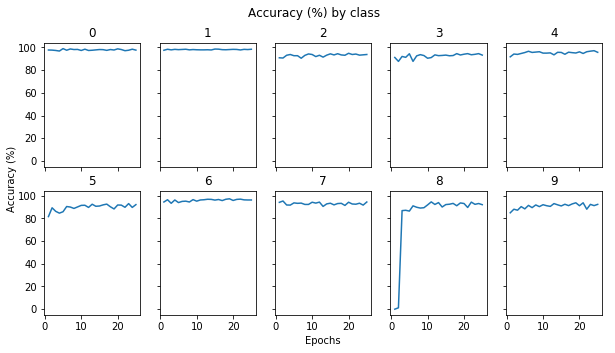

In [5]:
%matplotlib inline

from matplotlib_for_acc_by_class import plot

plot(10, len(test_accuracy), acc_by_class)

Mostrando agora a acurácia total temos o seguinte:

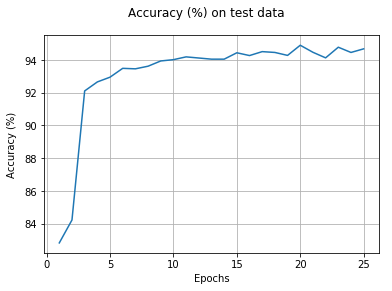

In [6]:
%matplotlib inline

from matplotlib_for_total_acc import plot

accuracy = [float(acc/100) for acc in test_accuracy]

plot(10, len(accuracy), accuracy)

Agora que já estamos munidos de dados suficientes, iremos realizar testes com outros valores para a taxa de aprendizado $\eta$ . Primeiro colocaremos um valor menor, neste caso $\eta = 2.0$

## Dia 2:

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 2.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8896 / 10000
Epoch 2: 9159 / 10000
Epoch 3: 9208 / 10000
Epoch 4: 9260 / 10000
Epoch 5: 9314 / 10000
Epoch 6: 9360 / 10000
Epoch 7: 9364 / 10000
Epoch 8: 9387 / 10000
Epoch 9: 9395 / 10000
Epoch 10: 9393 / 10000
Epoch 11: 9421 / 10000
Epoch 12: 9437 / 10000
Epoch 13: 9455 / 10000
Epoch 14: 9438 / 10000
Epoch 15: 9454 / 10000
Epoch 16: 9462 / 10000
Epoch 17: 9426 / 10000
Epoch 18: 9453 / 10000
Epoch 19: 9460 / 10000
Epoch 20: 9477 / 10000
Epoch 21: 9461 / 10000
Epoch 22: 9466 / 10000
Epoch 23: 9481 / 10000
Epoch 24: 9481 / 10000
Epoch 25: 9476 / 10000
Epoch 26: 9481 / 10000
Epoch 27: 9490 / 10000
Epoch 28: 9466 / 10000
Epoch 29: 9490 / 10000
Epoch 30: 9485 / 10000
Epoch 31: 9489 / 10000
Epoch 32: 9483 / 10000
Training complete after 32 epochs.
Best total accuracy: 9490

Elapsed time: 5min 6.51s


Apesar de ainda não haver plotado os gráficos com as acurácias já podemos notar que a nossa escolha para o valor de $\eta$ não foi das melhores, portanto faremos outro teste só que dessa vez com o valor de $\eta$ maior do que o inicial. Faremos então $\eta = 4.0$ .

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 4.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9073 / 10000
Epoch 2: 9179 / 10000
Epoch 3: 9303 / 10000
Epoch 4: 9287 / 10000
Epoch 5: 9391 / 10000
Epoch 6: 9403 / 10000
Epoch 7: 9408 / 10000
Epoch 8: 9420 / 10000
Epoch 9: 9416 / 10000
Epoch 10: 9428 / 10000
Epoch 11: 9405 / 10000
Epoch 12: 9420 / 10000
Epoch 13: 9455 / 10000
Epoch 14: 9437 / 10000
Epoch 15: 9453 / 10000
Epoch 16: 9438 / 10000
Epoch 17: 9436 / 10000
Epoch 18: 9473 / 10000
Epoch 19: 9456 / 10000
Epoch 20: 9474 / 10000
Epoch 21: 9506 / 10000
Epoch 22: 9476 / 10000
Epoch 23: 9464 / 10000
Epoch 24: 9480 / 10000
Epoch 25: 9490 / 10000
Epoch 26: 9480 / 10000
Training complete after 26 epochs.
Best total accuracy: 9506

Elapsed time: 4min 0.91s


Sem plotar os gráficos já temos uma melhora, tendo em conta que foi atingido uma melhor acurácia total maior do que a inicial com $\eta = 3.0$, agora plotaremos os gŕaficos e compararemos com os resultados anteriores.

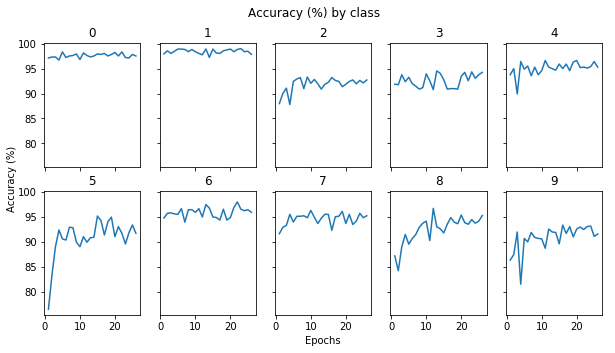

In [3]:
%matplotlib inline

from matplotlib_for_acc_by_class import plot

plot(10, len(test_accuracy), acc_by_class)

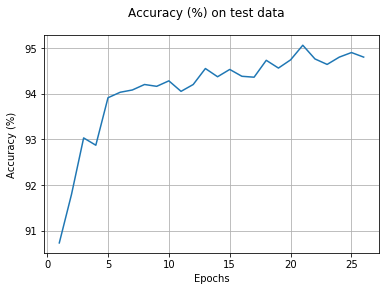

In [4]:
%matplotlib inline

from matplotlib_for_total_acc import plot

accuracy = [float(acc/100) for acc in test_accuracy]

plot(10, len(accuracy), accuracy)

Salvando os resultados em um arquivo:

In [5]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test2.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 4.0)

Agora tentaremos plotar uma sobreposição dos dois gráficos da acurácia total e avaliaremos se a escolha do $\eta$ foi boa ou não.

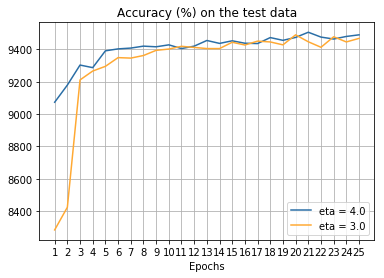

In [7]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test1.json")
data_test2 = load_data("saved_accuracies_official_test2.json")


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 3.0','#FFA933'), \
          ('eta = 4.0','#2A6EA6')])

else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 4.0','#2A6EA6'), \
          ('eta = 3.0','#FFA933')])

Com essa imagem das duas curvas sobrepostas podemos ver claramente que a curva onde $\eta = 4.0$ tem uma vantagem com relação à com $\eta = 3.0$ . Portanto estamos no caminho certo para encontrar um valor melhor para $\eta$ .

## Dia 3:

Faremos agora outro teste dessa vez com $\eta = 5.0$

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 5.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8175 / 10000
Epoch 2: 9066 / 10000
Epoch 3: 9268 / 10000
Epoch 4: 9258 / 10000
Epoch 5: 9374 / 10000
Epoch 6: 9402 / 10000
Epoch 7: 9385 / 10000
Epoch 8: 9409 / 10000
Epoch 9: 9443 / 10000
Epoch 10: 9386 / 10000
Epoch 11: 9430 / 10000
Epoch 12: 9436 / 10000
Epoch 13: 9441 / 10000
Epoch 14: 9454 / 10000
Epoch 15: 9480 / 10000
Epoch 16: 9438 / 10000
Epoch 17: 9449 / 10000
Epoch 18: 9453 / 10000
Epoch 19: 9466 / 10000
Epoch 20: 9497 / 10000
Epoch 21: 9470 / 10000
Epoch 22: 9495 / 10000
Epoch 23: 9492 / 10000
Epoch 24: 9485 / 10000
Epoch 25: 9503 / 10000
Epoch 26: 9522 / 10000
Epoch 27: 9512 / 10000
Epoch 28: 9475 / 10000
Epoch 29: 9482 / 10000
Epoch 30: 9522 / 10000
Epoch 31: 9498 / 10000
Training complete after 31 epochs.
Best total accuracy: 9522

Elapsed time: 4min 9.77s


Novamente tivemos uma melhora. Plotaremos de novo os gráficos referentes a tal melhora.

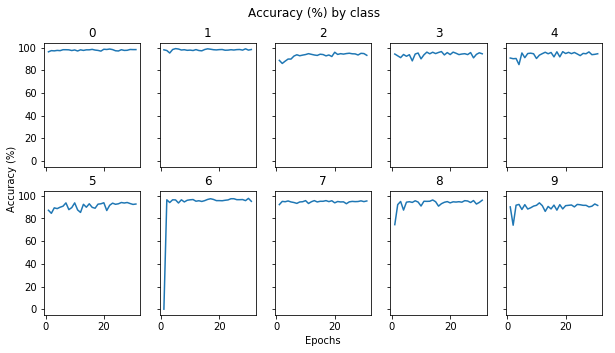

In [3]:
%matplotlib inline

from matplotlib_for_acc_by_class import plot

plot(10, len(test_accuracy), acc_by_class)

Gravando em um arquivo:

In [4]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test3.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 5.0)

Plotando os gráficos sobrepostos:

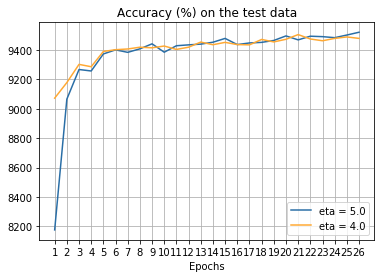

In [5]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test2.json")
data_test2 = load_data("saved_accuracies_official_test3.json")


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 4.0','#FFA933'), \
          ('eta = 5.0','#2A6EA6')])

else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 5.0','#2A6EA6'), \
          ('eta = 4.0','#FFA933')])

Anaisando o gráfico acima vimos que os desempenhos estão muito próximos, portanto, podemos pensar que é possível que um $\eta$ com valor melhor tenha um valor tal que $4.0\leq\eta\leq5.0$ . Consideraremos então o ponto médio desse intervalo, ou seja, $\eta = 4.5$ .

## Dia 4:

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 4.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8279 / 10000
Epoch 2: 9261 / 10000
Epoch 3: 9295 / 10000
Epoch 4: 9303 / 10000
Epoch 5: 9359 / 10000
Epoch 6: 9388 / 10000
Epoch 7: 9346 / 10000
Epoch 8: 9416 / 10000
Epoch 9: 9389 / 10000
Epoch 10: 9420 / 10000
Epoch 11: 9426 / 10000
Epoch 12: 9424 / 10000
Epoch 13: 9390 / 10000
Epoch 14: 9404 / 10000
Epoch 15: 9422 / 10000
Epoch 16: 9434 / 10000
Epoch 17: 9439 / 10000
Epoch 18: 9446 / 10000
Epoch 19: 9439 / 10000
Epoch 20: 9437 / 10000
Epoch 21: 9463 / 10000
Epoch 22: 9453 / 10000
Epoch 23: 9434 / 10000
Epoch 24: 9425 / 10000
Epoch 25: 9433 / 10000
Epoch 26: 9424 / 10000
Training complete after 26 epochs.
Best total accuracy: 9463

Elapsed time: 3min 43.59s


Já que não houve melhora significativa, continuaremos aumentando o valor de $\eta$, dessa vez com $\eta = 6.0$

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 6.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9106 / 10000
Epoch 2: 9241 / 10000
Epoch 3: 9254 / 10000
Epoch 4: 9341 / 10000
Epoch 5: 9378 / 10000
Epoch 6: 9430 / 10000
Epoch 7: 9438 / 10000
Epoch 8: 9472 / 10000
Epoch 9: 9451 / 10000
Epoch 10: 9497 / 10000
Epoch 11: 9488 / 10000
Epoch 12: 9475 / 10000
Epoch 13: 9515 / 10000
Epoch 14: 9460 / 10000
Epoch 15: 9488 / 10000
Epoch 16: 9480 / 10000
Epoch 17: 9484 / 10000
Epoch 18: 9496 / 10000
Training complete after 18 epochs.
Best total accuracy: 9515

Elapsed time: 2min 27.55s


Apesar de não haver alcançado a acurácia geral máxima do $\eta = 4.0$, com $\eta = 6.0$ chegamos mais rápido a um ponto bem parecido. Compararemos então as acurácias plotando os gráficos, mas antes vamos salvar o progresso nem um arquivo, como de costume.

In [3]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test4.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 6.0)

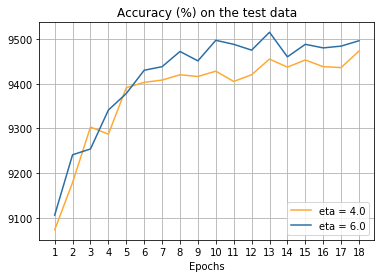

In [4]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test2.json")
data_test2 = load_data("saved_accuracies_official_test4.json")


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 4.0','#FFA933'), \
          ('eta = 6.0','#2A6EA6')])

else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 6.0','#2A6EA6'), \
          ('eta = 4.0','#FFA933')])

Bom, o que vemos no gráfico já é suficiente para induzirmos que a rede treinada com $\eta = 6.0$ atingiu um resultado melhor em um número menor de épocas, portanto, iremos tomá-la como referência a partir de agora e continuaremos nossa busca pela taxa de aprendizagem $\eta$ perfeita. Usaremos agora $\eta = 7.0$.

In [6]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 7.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9478 / 10000
Epoch 2: 9483 / 10000
Epoch 3: 9484 / 10000
Epoch 4: 9503 / 10000
Epoch 5: 9494 / 10000
Epoch 6: 9487 / 10000
Epoch 7: 9543 / 10000
Epoch 8: 9454 / 10000
Epoch 9: 9524 / 10000
Epoch 10: 9528 / 10000
Epoch 11: 9516 / 10000
Epoch 12: 9530 / 10000
Training complete after 12 epochs.
Best total accuracy: 9543

Elapsed time: 1min 36.64s


Desta vez podemos ver uma boa melhora novamente. Contudo, podemos notar que nossa rede está estagnando cada vez mais rápido, isto é, durando menos épocas. Isso não necessariamente é um problema se levarmos em conta que nosso critério de parada foi baixo justamnete para que fosse possível fazer testes mais rápidos. Novamente salvaremos os resultados e plotaremos os gráficos comparando as duas performances.

In [7]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test5.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 7.0)

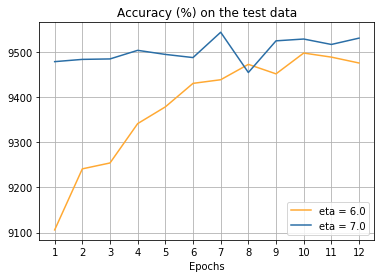

In [8]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test4.json")
data_test2 = load_data("saved_accuracies_official_test5.json")


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 6.0','#FFA933'), \
          ('eta = 7.0','#2A6EA6')])

else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 7.0','#2A6EA6'), \
          ('eta = 6.0','#FFA933')])

Podemos ver claramente que a curva $\eta = 7.0$ está sobre a do $\eta = 6.0$. Novamente houve progresso. Continuaremos com nosso roteiro e repetiremos o teste com $\eta = 8.0$.

In [9]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 8.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9532 / 10000
Epoch 2: 9521 / 10000
Epoch 3: 9477 / 10000
Epoch 4: 9479 / 10000
Epoch 5: 9518 / 10000
Epoch 6: 9525 / 10000
Training complete after 6 epochs.
Best total accuracy: 9532

Elapsed time: 0min 48.69s


Notamos que as épocas ficam cada vez menores enquanto avançamos. Supõe-se que seja devido a um fenômeno chamado *overshooting* que é devido a um valor de $\eta$ alto que faz com que, ao encontrar um ponto de mínimo local da função custo, pelo valor de $\eta$ ser alto ele pode ficar oscilando em torno desse mínimo local. Continuaremos com os nossos testes agora com $\eta = 9.0$ e veremos como se obtemos progresso.

In [10]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 9.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9494 / 10000
Epoch 2: 9498 / 10000
Epoch 3: 9483 / 10000
Epoch 4: 9462 / 10000
Epoch 5: 9488 / 10000
Epoch 6: 9478 / 10000
Epoch 7: 9490 / 10000
Training complete after 7 epochs.
Best total accuracy: 9498

Elapsed time: 0min 57.56s


Temos mais uma evidência de que nosso valor de $\eta$ está alto. Para ter certeza desse fato faremos $\eta = 10.0$

In [11]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 10.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9486 / 10000
Epoch 2: 9440 / 10000
Epoch 3: 9475 / 10000
Epoch 4: 9530 / 10000
Epoch 5: 9513 / 10000
Epoch 6: 9474 / 10000
Epoch 7: 9503 / 10000
Epoch 8: 9468 / 10000
Epoch 9: 9526 / 10000
Training complete after 9 epochs.
Best total accuracy: 9530

Elapsed time: 1min 13.46s


Bom, agora temos certeza de que nossa análise estava correta, visto que os últimos experimentos pararam em um número de épocas inferior a 10. Agora voltaremos ao ponto $\eta = 6.0$ e repetiremos o teste para avaliarmos se é uma escolha melhor do que $\eta = 4.0$, já que, apesar de a acurácia ter superado a com $\eta = 4.0$, a rede estagnou mais rápido.

In [12]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 6.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9564 / 10000
Epoch 2: 9541 / 10000
Epoch 3: 9554 / 10000
Epoch 4: 9557 / 10000
Epoch 5: 9528 / 10000
Epoch 6: 9546 / 10000
Training complete after 6 epochs.
Best total accuracy: 9564

Elapsed time: 0min 48.89s


Notamos que, apesar de superar a rede treinada com $\eta = 4.0$ em termos de acurácia, a rede estagna muito mais rápido, o que evidencia o fenômeno *overshooting*. Agora que encontramos um novo ponto referência ($\eta = 4.0$) tentaremos um $\eta$ tal que $3.0\leq\eta\leq4.0$ tal como $\eta = 3.5$.

In [13]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9578 / 10000
Epoch 2: 9576 / 10000
Epoch 3: 9578 / 10000
Epoch 4: 9576 / 10000
Epoch 5: 9590 / 10000
Epoch 6: 9576 / 10000
Epoch 7: 9600 / 10000
Epoch 8: 9583 / 10000
Epoch 9: 9583 / 10000
Epoch 10: 9578 / 10000
Epoch 11: 9588 / 10000
Epoch 12: 9581 / 10000
Training complete after 12 epochs.
Best total accuracy: 9600

Elapsed time: 1min 39.52s


Aqui já podemos ver uma melhora mais do que significativa em termos de acurácia. Contudo, há um porém, como os pesos e os ajustes são iniciados de forma aleatória na rede, pode ser que, nesse teste, a rede "tenha tido sorte" e ocasionalmente chegado a um ponto melhor. Repetiremos o teste.

In [14]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9581 / 10000
Epoch 2: 9593 / 10000
Epoch 3: 9579 / 10000
Epoch 4: 9567 / 10000
Epoch 5: 9578 / 10000
Epoch 6: 9582 / 10000
Epoch 7: 9570 / 10000
Training complete after 7 epochs.
Best total accuracy: 9593

Elapsed time: 0min 58.02s


Agora verificamos que não foi sorte. A rede realmente tem maior performance em termos de acurácia do que a anterior. Inclusive sempre inicializando em um ponto melhor do que quando $\eta = 4.0$. Refinaremos ainda mais esse resultado testando um valor para $\eta$ tal que $3.0\leq\eta\leq4.0$, ou seja, $\eta = 3.25$.

In [16]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.25, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9582 / 10000
Epoch 2: 9578 / 10000
Epoch 3: 9583 / 10000
Epoch 4: 9570 / 10000
Epoch 5: 9573 / 10000
Epoch 6: 9582 / 10000
Epoch 7: 9584 / 10000
Epoch 8: 9583 / 10000
Epoch 9: 9576 / 10000
Epoch 10: 9583 / 10000
Epoch 11: 9584 / 10000
Epoch 12: 9584 / 10000
Training complete after 12 epochs.
Best total accuracy: 9584

Elapsed time: 1min 38.03s


Bom, não obtivemos melhora. Portanto, faremos o seguinte: agora caminharemos para o lado contrário. Isto é, dessa vez teremos um valor de $\eta$ tal que $3.5\leq\eta\leq4.0$, portanto, $\eta = 3.75$.

In [17]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.75, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9582 / 10000
Epoch 2: 9573 / 10000
Epoch 3: 9570 / 10000
Epoch 4: 9585 / 10000
Epoch 5: 9587 / 10000
Epoch 6: 9576 / 10000
Epoch 7: 9586 / 10000
Epoch 8: 9579 / 10000
Epoch 9: 9582 / 10000
Epoch 10: 9581 / 10000
Training complete after 10 epochs.
Best total accuracy: 9587

Elapsed time: 1min 30.05s


Novamente nenhuma melhora significativa. Agora nossa referência é oficialmente $\eta = 3.5$. Fazendo mais alguns testes não feitos antes apenas para "brincar" um pouco, faremos $\eta = 1.0$.

In [18]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 1.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9578 / 10000
Epoch 2: 9578 / 10000
Epoch 3: 9585 / 10000
Epoch 4: 9580 / 10000
Epoch 5: 9579 / 10000
Epoch 6: 9582 / 10000
Epoch 7: 9584 / 10000
Epoch 8: 9584 / 10000
Training complete after 8 epochs.
Best total accuracy: 9585

Elapsed time: 1min 6.15s


Dessa vez tivemos uma surpresa! Por pouco a escolha $\eta = 1.0$ não ultrapassou a escolha $\eta = 3.5$. Faremos com $\eta = 0.5$ e veremos se descobrimos alguma melhora.

In [19]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 0.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9580 / 10000
Epoch 2: 9582 / 10000
Epoch 3: 9585 / 10000
Epoch 4: 9582 / 10000
Epoch 5: 9582 / 10000
Epoch 6: 9579 / 10000
Epoch 7: 9583 / 10000
Epoch 8: 9580 / 10000
Training complete after 8 epochs.
Best total accuracy: 9585

Elapsed time: 1min 8.04s


Sem melhoras significativas por enquanto... Testemos $\eta = 0.25$.

In [20]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 0.25, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9581 / 10000
Epoch 2: 9581 / 10000
Epoch 3: 9582 / 10000
Epoch 4: 9581 / 10000
Epoch 5: 9580 / 10000
Epoch 6: 9583 / 10000
Epoch 7: 9582 / 10000
Epoch 8: 9583 / 10000
Epoch 9: 9581 / 10000
Epoch 10: 9581 / 10000
Epoch 11: 9584 / 10000
Epoch 12: 9581 / 10000
Epoch 13: 9584 / 10000
Epoch 14: 9579 / 10000
Epoch 15: 9583 / 10000
Epoch 16: 9581 / 10000
Training complete after 16 epochs.
Best total accuracy: 9584

Elapsed time: 2min 41.83s


Nenhuma melhora dessa vez. Bom, acredito que encontramos um ponto ótimo para trabalhar, este é onde $\eta = 3.5$. Agora apenas colocaremos o critério de parada um pouco maior para plotarmos os gráficos finais.

In [25]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 10, 10, 3.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9565 / 10000
Epoch 2: 9560 / 10000
Epoch 3: 9558 / 10000
Epoch 4: 9574 / 10000
Epoch 5: 9562 / 10000
Epoch 6: 9555 / 10000
Epoch 7: 9559 / 10000
Epoch 8: 9566 / 10000
Epoch 9: 9563 / 10000
Epoch 10: 9571 / 10000
Epoch 11: 9563 / 10000
Epoch 12: 9567 / 10000
Epoch 13: 9568 / 10000
Epoch 14: 9563 / 10000
Training complete after 14 epochs.
Best total accuracy: 9574

Elapsed time: 2min 9.38s


Nesse teste final vemos que nosso ponto de referência não foi a melhor escolha. Voltamos à estaca zero e tentamos outra vez com $\eta = 4.0$

In [27]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 10, 10, 4.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9554 / 10000
Epoch 2: 9564 / 10000
Epoch 3: 9562 / 10000
Epoch 4: 9543 / 10000
Epoch 5: 9546 / 10000
Epoch 6: 9561 / 10000
Epoch 7: 9555 / 10000
Epoch 8: 9561 / 10000
Epoch 9: 9553 / 10000
Epoch 10: 9551 / 10000
Epoch 11: 9553 / 10000
Epoch 12: 9556 / 10000
Training complete after 12 epochs.
Best total accuracy: 9564

Elapsed time: 1min 57.38s


Realmente a escolha de $\eta = 3.5$ é melhor do que pensávamos. Ou quem sabe $\eta = 0.75$ seria uma escolha melhor. Vamos lá!

In [30]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 10, 10, 0.75, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9560 / 10000
Epoch 2: 9562 / 10000
Epoch 3: 9560 / 10000
Epoch 4: 9558 / 10000
Epoch 5: 9561 / 10000
Epoch 6: 9564 / 10000
Epoch 7: 9564 / 10000
Epoch 8: 9561 / 10000
Epoch 9: 9562 / 10000
Epoch 10: 9560 / 10000
Epoch 11: 9562 / 10000
Epoch 12: 9560 / 10000
Epoch 13: 9560 / 10000
Epoch 14: 9560 / 10000
Epoch 15: 9563 / 10000
Epoch 16: 9559 / 10000
Training complete after 16 epochs.
Best total accuracy: 9564

Elapsed time: 2min 37.68s


## Dia 5:

Após uma análise rápida do progresso do dia anterior, pode haver uma pequena falha nos testes devido à não inicialização da rede do zero entre um teste e outro. Testaremos essa hipótese hoje. Voltaremos ao $\eta = 4.0$.

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 4.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8236 / 10000
Epoch 2: 9199 / 10000
Epoch 3: 9267 / 10000
Epoch 4: 9333 / 10000
Epoch 5: 9383 / 10000
Epoch 6: 9382 / 10000
Epoch 7: 9347 / 10000
Epoch 8: 9446 / 10000
Epoch 9: 9441 / 10000
Epoch 10: 9460 / 10000
Epoch 11: 9473 / 10000
Epoch 12: 9468 / 10000
Epoch 13: 9466 / 10000
Epoch 14: 9464 / 10000
Epoch 15: 9503 / 10000
Epoch 16: 9483 / 10000
Epoch 17: 9493 / 10000
Epoch 18: 9492 / 10000
Epoch 19: 9528 / 10000
Epoch 20: 9490 / 10000
Epoch 21: 9502 / 10000
Epoch 22: 9506 / 10000
Epoch 23: 9512 / 10000
Epoch 24: 9503 / 10000
Training complete after 24 epochs.
Best total accuracy: 9528

Elapsed time: 3min 11.39s


Agora testando novamente a mesma rede da maneira que foi feita ontem:

In [3]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 4.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9524 / 10000
Epoch 2: 9524 / 10000
Epoch 3: 9496 / 10000
Epoch 4: 9523 / 10000
Epoch 5: 9545 / 10000
Epoch 6: 9502 / 10000
Epoch 7: 9497 / 10000
Epoch 8: 9522 / 10000
Epoch 9: 9506 / 10000
Epoch 10: 9508 / 10000
Training complete after 10 epochs.
Best total accuracy: 9545

Elapsed time: 1min 19.59s


Podemos notar agora que o erro nos nossos testes anteriores foi a falta de reinicialização, o que jogou nosso dia de trabalho "no lixo" :( . Então agora faremos o seguinte: tentaremos reiniciar a rede com uma linha de código a mais (comentada abaixo) para vermos se não é necessário reiniciar o kernel do Jupyter.

In [4]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 4.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9035 / 10000
Epoch 2: 9262 / 10000
Epoch 3: 9289 / 10000
Epoch 4: 9321 / 10000
Epoch 5: 9340 / 10000
Epoch 6: 9367 / 10000
Epoch 7: 9387 / 10000
Epoch 8: 9398 / 10000
Epoch 9: 9427 / 10000
Epoch 10: 9426 / 10000
Epoch 11: 9408 / 10000
Epoch 12: 9444 / 10000
Epoch 13: 9429 / 10000
Epoch 14: 9468 / 10000
Epoch 15: 9463 / 10000
Epoch 16: 9468 / 10000
Epoch 17: 9447 / 10000
Epoch 18: 9497 / 10000
Epoch 19: 9478 / 10000
Epoch 20: 9485 / 10000
Epoch 21: 9497 / 10000
Epoch 22: 9456 / 10000
Epoch 23: 9466 / 10000
Training complete after 23 epochs.
Best total accuracy: 9497

Elapsed time: 3min 10.34s


Bom, então voltando à estaca "zero" temos que o último valor de $\eta$ encontrado foi $6.0$ . Portanto agora tentaremos novamente $\eta = 7.0$.

In [1]:
import mnist_loader
import network
from timeit import default_timer as timer
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 7.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9192 / 10000
Epoch 2: 9206 / 10000
Epoch 3: 9314 / 10000
Epoch 4: 9360 / 10000
Epoch 5: 9375 / 10000
Epoch 6: 9411 / 10000
Epoch 7: 9446 / 10000
Epoch 8: 9471 / 10000
Epoch 9: 9415 / 10000
Epoch 10: 9432 / 10000
Epoch 11: 9450 / 10000
Epoch 12: 9472 / 10000
Epoch 13: 9496 / 10000
Epoch 14: 9472 / 10000
Epoch 15: 9473 / 10000
Epoch 16: 9450 / 10000
Epoch 17: 9497 / 10000
Epoch 18: 9499 / 10000
Epoch 19: 9509 / 10000
Epoch 20: 9469 / 10000
Epoch 21: 9510 / 10000
Epoch 22: 9499 / 10000
Epoch 23: 9514 / 10000
Epoch 24: 9512 / 10000
Epoch 25: 9484 / 10000
Epoch 26: 9519 / 10000
Epoch 27: 9519 / 10000
Epoch 28: 9495 / 10000
Epoch 29: 9529 / 10000
Epoch 30: 9508 / 10000
Epoch 31: 9517 / 10000
Epoch 32: 9499 / 10000
Epoch 33: 9542 / 10000
Epoch 34: 9517 / 10000
Epoch 35: 9519 / 10000
Epoch 36: 9530 / 10000
Epoch 37: 9488 / 10000
Epoch 38: 9497 / 10000
Training complete after 38 epochs.
Best total accuracy: 9542

Elapsed time: 5min 36.63s


Bom, apesar de ter passado a acurácia de $\eta = 6.0$, foram necessárias mais épocas de treinamento para se obter o resultado. De todos modos salvaremos os resultados e compararemos usando os gráficos.

In [2]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test5.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 7.0)

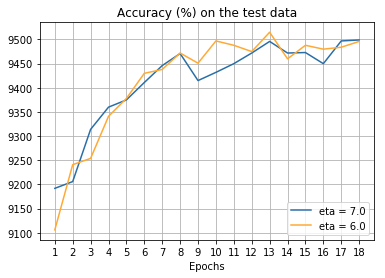

In [3]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test4.json") # here it goes the reference value of eta
data_test2 = load_data("saved_accuracies_official_test5.json") # and here the one you want to test it


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 6.0','#FFA933'), \
          ('eta = 7.0','#2A6EA6')])
else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 7.0','#2A6EA6'), \
          ('eta = 6.0','#FFA933')])

Notamos que a curva $\eta = 6.0$ é um pouco melhor do que a curva $\eta = 7.0$, pelo menos até onde vão as épocas de treinamento. Já que os resultados foram parecidos, veremos se o ponto médio entre $6.0$ e $7.0$, isto é $\eta = 6.5$ tem uma melhor performance.

In [5]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 6.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8231 / 10000
Epoch 2: 9203 / 10000
Epoch 3: 9275 / 10000
Epoch 4: 9325 / 10000
Epoch 5: 9361 / 10000
Epoch 6: 9359 / 10000
Epoch 7: 9407 / 10000
Epoch 8: 9404 / 10000
Epoch 9: 9389 / 10000
Epoch 10: 9363 / 10000
Epoch 11: 9374 / 10000
Epoch 12: 9450 / 10000
Epoch 13: 9438 / 10000
Epoch 14: 9460 / 10000
Epoch 15: 9452 / 10000
Epoch 16: 9474 / 10000
Epoch 17: 9457 / 10000
Epoch 18: 9480 / 10000
Epoch 19: 9457 / 10000
Epoch 20: 9455 / 10000
Epoch 21: 9402 / 10000
Epoch 22: 9471 / 10000
Epoch 23: 9463 / 10000
Training complete after 23 epochs.
Best total accuracy: 9480

Elapsed time: 3min 30.76s


Não obtivemos melhora desta vez, então por enquanto a referência para o nosso estudo é $\eta = 6.0$. Tentaremos agora o valor médio entre $5.0$ e $6.0$, isto é, $\eta = 5.5$.

In [6]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 5.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9101 / 10000
Epoch 2: 9197 / 10000
Epoch 3: 9304 / 10000
Epoch 4: 9423 / 10000
Epoch 5: 9416 / 10000
Epoch 6: 9380 / 10000
Epoch 7: 9424 / 10000
Epoch 8: 9456 / 10000
Epoch 9: 9434 / 10000
Epoch 10: 9445 / 10000
Epoch 11: 9358 / 10000
Epoch 12: 9454 / 10000
Epoch 13: 9473 / 10000
Epoch 14: 9466 / 10000
Epoch 15: 9446 / 10000
Epoch 16: 9432 / 10000
Epoch 17: 9494 / 10000
Epoch 18: 9491 / 10000
Epoch 19: 9470 / 10000
Epoch 20: 9463 / 10000
Epoch 21: 9469 / 10000
Epoch 22: 9479 / 10000
Training complete after 22 epochs.
Best total accuracy: 9494

Elapsed time: 3min 35.83s


Bom, agora é oficial. Nosso ponto de referência para todos os efeitos é $\eta = 6.0$. Agora que já tentamos bastante com valores maiores de $\eta$ tentaremos agora valores menores usando $\eta = 1.0$, por exemplo.

In [7]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 1.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 6607 / 10000
Epoch 2: 7349 / 10000
Epoch 3: 7484 / 10000
Epoch 4: 8306 / 10000
Epoch 5: 8371 / 10000
Epoch 6: 8406 / 10000
Epoch 7: 9201 / 10000
Epoch 8: 9272 / 10000
Epoch 9: 9329 / 10000
Epoch 10: 9281 / 10000
Epoch 11: 9337 / 10000
Epoch 12: 9338 / 10000
Epoch 13: 9367 / 10000
Epoch 14: 9354 / 10000
Epoch 15: 9369 / 10000
Epoch 16: 9392 / 10000
Epoch 17: 9363 / 10000
Epoch 18: 9374 / 10000
Epoch 19: 9381 / 10000
Epoch 20: 9393 / 10000
Epoch 21: 9396 / 10000
Epoch 22: 9406 / 10000
Epoch 23: 9403 / 10000
Epoch 24: 9400 / 10000
Epoch 25: 9399 / 10000
Epoch 26: 9404 / 10000
Epoch 27: 9418 / 10000
Epoch 28: 9403 / 10000
Epoch 29: 9401 / 10000
Epoch 30: 9421 / 10000
Epoch 31: 9407 / 10000
Epoch 32: 9417 / 10000
Epoch 33: 9411 / 10000
Epoch 34: 9433 / 10000
Epoch 35: 9439 / 10000
Epoch 36: 9410 / 10000
Epoch 37: 9424 / 10000
Epoch 38: 9437 / 10000
Epoch 39: 9433 / 10000
Epoch 40: 9422 / 10000
Training complete after 40 epochs.
Best total accuracy: 9439

Elapsed time: 6min 20.69s


Como não obtivemos bons resultados, continuaremos com o nosso ponto de referência onde estava e agora faremos apenas um teste final apenas por "desencargo de consciẽncia". Dessa vez será $\eta = 3.5$.

In [8]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9042 / 10000
Epoch 2: 9237 / 10000
Epoch 3: 9331 / 10000
Epoch 4: 9364 / 10000
Epoch 5: 9380 / 10000
Epoch 6: 9408 / 10000
Epoch 7: 9419 / 10000
Epoch 8: 9469 / 10000
Epoch 9: 9422 / 10000
Epoch 10: 9469 / 10000
Epoch 11: 9456 / 10000
Epoch 12: 9491 / 10000
Epoch 13: 9488 / 10000
Epoch 14: 9487 / 10000
Epoch 15: 9524 / 10000
Epoch 16: 9497 / 10000
Epoch 17: 9503 / 10000
Epoch 18: 9491 / 10000
Epoch 19: 9499 / 10000
Epoch 20: 9491 / 10000
Training complete after 20 epochs.
Best total accuracy: 9524

Elapsed time: 3min 23.79s


Verificamos que talvez devêssemos mudar a referência agora. Mas antes vamos salvar esses resultados e plotar os gráficos para efeito de comparação entre $\eta = 6.0$ e $\eta = 3.5$.

In [9]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test6.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 3.5)

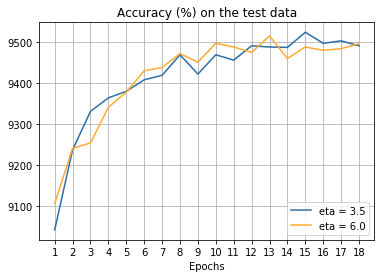

In [10]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test4.json") # here it goes the reference value of eta
data_test2 = load_data("saved_accuracies_official_test6.json") # and here the one you want to test it


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 6.0','#FFA933'), \
          ('eta = 3.5','#2A6EA6')])
else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 3.5','#2A6EA6'), \
          ('eta = 6.0','#FFA933')])

Verificamos que os resultados são bastante parecidos, portanto será necessário uma comparação com $\eta = 4.0$.

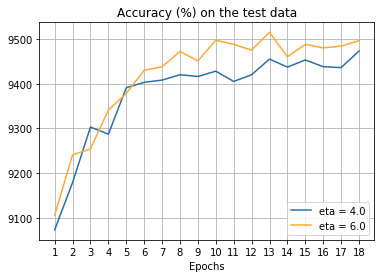

In [11]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test4.json") # here it goes the reference value of eta
data_test2 = load_data("saved_accuracies_official_test2.json") # and here the one you want to test it


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 6.0','#FFA933'), \
          ('eta = 4.0','#2A6EA6')])
else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 4.0','#2A6EA6'), \
          ('eta = 6.0','#FFA933')])

Comprovamos então que talvez $\eta = 3.5$ seja um bom ponto de referência, mas antes faremos mais alguns testes dessa vez estimando um valor $\eta > 3.5$ depois, se não der certo, faremos $\eta < 3.5$.

In [12]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.75, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9047 / 10000
Epoch 2: 9229 / 10000
Epoch 3: 9282 / 10000
Epoch 4: 9331 / 10000
Epoch 5: 9359 / 10000
Epoch 6: 9387 / 10000
Epoch 7: 9397 / 10000
Epoch 8: 9444 / 10000
Epoch 9: 9427 / 10000
Epoch 10: 9458 / 10000
Epoch 11: 9423 / 10000
Epoch 12: 9499 / 10000
Epoch 13: 9477 / 10000
Epoch 14: 9453 / 10000
Epoch 15: 9454 / 10000
Epoch 16: 9467 / 10000
Epoch 17: 9485 / 10000
Training complete after 17 epochs.
Best total accuracy: 9499

Elapsed time: 2min 20.89s


Vemos que não foi uma boa escolha. Tentaremos agora $\eta = 3.25$.

In [13]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.25, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 8050 / 10000
Epoch 2: 9259 / 10000
Epoch 3: 9319 / 10000
Epoch 4: 9349 / 10000
Epoch 5: 9252 / 10000
Epoch 6: 9382 / 10000
Epoch 7: 9396 / 10000
Epoch 8: 9321 / 10000
Epoch 9: 9429 / 10000
Epoch 10: 9462 / 10000
Epoch 11: 9449 / 10000
Epoch 12: 9449 / 10000
Epoch 13: 9434 / 10000
Epoch 14: 9455 / 10000
Epoch 15: 9449 / 10000
Training complete after 15 epochs.
Best total accuracy: 9462

Elapsed time: 2min 4.35s


Bom, menos um valor de $\eta$ para se trabalhar. Estamos então entre $\eta = 3.5$ e $\eta = 6.0$ para escolher entre esses qual o ponto de referência que usaremos para trabalhar. Para decidir qual deles é o melhor, dessa vez variaremos o valor do critério de parada. Aumentaremos para 10 o número de épocas com as quais se não houver nenhuma melhor na acurácia a rede parará de ser treinada. 

In [14]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 10, 10, 6.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9019 / 10000
Epoch 2: 9212 / 10000
Epoch 3: 9260 / 10000
Epoch 4: 9383 / 10000
Epoch 5: 9353 / 10000
Epoch 6: 9395 / 10000
Epoch 7: 9428 / 10000
Epoch 8: 9390 / 10000
Epoch 9: 9449 / 10000
Epoch 10: 9444 / 10000
Epoch 11: 9426 / 10000
Epoch 12: 9441 / 10000
Epoch 13: 9468 / 10000
Epoch 14: 9408 / 10000
Epoch 15: 9488 / 10000
Epoch 16: 9495 / 10000
Epoch 17: 9448 / 10000
Epoch 18: 9436 / 10000
Epoch 19: 9458 / 10000
Epoch 20: 9470 / 10000
Epoch 21: 9496 / 10000
Epoch 22: 9486 / 10000
Epoch 23: 9470 / 10000
Epoch 24: 9485 / 10000
Epoch 25: 9472 / 10000
Epoch 26: 9443 / 10000
Epoch 27: 9479 / 10000
Epoch 28: 9470 / 10000
Epoch 29: 9461 / 10000
Epoch 30: 9481 / 10000
Epoch 31: 9481 / 10000
Training complete after 31 epochs.
Best total accuracy: 9496

Elapsed time: 4min 22.83s


In [15]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test7.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 10, 10, 6.0)

In [16]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 10, 10, 3.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Epoch 1: 9110 / 10000
Epoch 2: 9249 / 10000
Epoch 3: 9287 / 10000
Epoch 4: 9394 / 10000
Epoch 5: 9404 / 10000
Epoch 6: 9408 / 10000
Epoch 7: 9443 / 10000
Epoch 8: 9403 / 10000
Epoch 9: 9425 / 10000
Epoch 10: 9426 / 10000
Epoch 11: 9466 / 10000
Epoch 12: 9443 / 10000
Epoch 13: 9486 / 10000
Epoch 14: 9451 / 10000
Epoch 15: 9462 / 10000
Epoch 16: 9468 / 10000
Epoch 17: 9488 / 10000
Epoch 18: 9474 / 10000
Epoch 19: 9506 / 10000
Epoch 20: 9464 / 10000
Epoch 21: 9500 / 10000
Epoch 22: 9502 / 10000
Epoch 23: 9496 / 10000
Epoch 24: 9470 / 10000
Epoch 25: 9498 / 10000
Epoch 26: 9512 / 10000
Epoch 27: 9496 / 10000
Epoch 28: 9481 / 10000
Epoch 29: 9516 / 10000
Epoch 30: 9502 / 10000
Epoch 31: 9489 / 10000
Epoch 32: 9497 / 10000
Epoch 33: 9490 / 10000
Epoch 34: 9471 / 10000
Epoch 35: 9514 / 10000
Epoch 36: 9520 / 10000
Epoch 37: 9494 / 10000
Epoch 38: 9484 / 10000
Epoch 39: 9498 / 10000
Epoch 40: 9495 / 10000
Epoch 41: 9500 / 10000
Epoch 42: 9508 / 10000
Epoch 43: 9518 / 10000
Epoch 44: 9491 / 100

In [17]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import saving_data as sd
sd.save_data("saved_accuracies_official_test8.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 10, 10, 3.5)

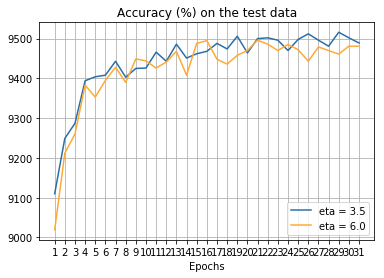

In [18]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test7.json") # here it goes the reference value of eta
data_test2 = load_data("saved_accuracies_official_test8.json") # and here the one you want to test it


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 6.0','#FFA933'), \
          ('eta = 3.5','#2A6EA6')])
else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 3.5','#2A6EA6'), \
          ('eta = 6.0','#FFA933')])

Verificamos, finalmente, por experimentação (e depois de muuuito trabalho) que $\eta = 3.5$ é nosso valor de $\eta$ final. Agora exibiremos a acurácia por classe do nosso ponto de referência e a comparação final com $\eta$ inicial.

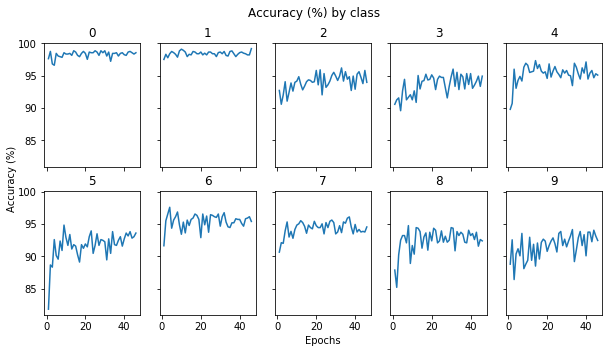

In [19]:
%matplotlib inline

from matplotlib_for_acc_by_class import plot

plot(10, len(test_accuracy), acc_by_class)

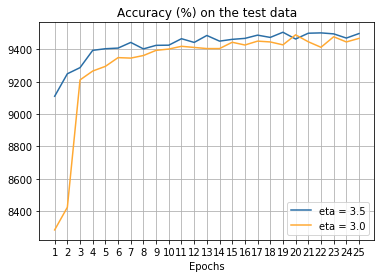

In [21]:
from matplotlib_for_total_acc_2 import plot
import json

# Loading results from a file
def load_data(filename):
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    return data
#*************************************

accuracy = []

data_test1 = load_data("saved_accuracies_official_test1.json") # here it goes the reference value of eta
data_test2 = load_data("saved_accuracies_official_test8.json") # and here the one you want to test it


# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 3.0','#FFA933'), \
          ('eta = 3.5','#2A6EA6')])
else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 3.5','#2A6EA6'), \
          ('eta = 3.0','#FFA933')])

E aqui acaba o nosso trabalho de achar o $\eta$ perfeito.

## Conclusão:

Baseado nos resultados apresentados eu acharia mais fácil seguir a evolução dos valores do custo por época, já que podemos ver claramente quando $\eta$ está muito alto, muito baixo ou está bom. Para ilustrar melhor há a imagem abaixo

In [26]:
%%HTML
<img src="choosing_learning_rate.png">
<!-- Fonte: https://qph.fs.quoracdn.net/main-qimg-9076a348570818a3843df345eaa9e053 -->

Ou então melhor ainda, usar um algoritmo adaptativo que, além de modificar a taxa de aprendizado de acordo com a necessidade ainda é capaz de fazê-lo para todos os parâmetros.

Enfim, há muitas maneiras diferentes de se abordar o problema da busca por parâmetros otimizados, mas todos eles trabalham com extensiva e exaustiva experimentação.